pip install yfinance
pip install matplotlib

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
start_date='2021-10-01'
end_date='2022-10-15'
ticker=['AAPL','ABT']

In [4]:
data=yf.download(ticker,start=start_date,end=end_date)

[*********************100%***********************]  2 of 2 completed


In [5]:
data.head()

Adj Close                   Close              \
                                 AAPL         ABT        AAPL         ABT   
Date                                                                        
2021-10-01 00:00:00-04:00  141.620148  114.832253  142.649994  117.209999   
2021-10-04 00:00:00-04:00  138.135529  113.186340  139.139999  115.529999   
2021-10-05 00:00:00-04:00  140.091293  113.529243  141.110001  115.879997   
2021-10-06 00:00:00-04:00  140.974869  114.126869  142.000000  116.489998   
2021-10-07 00:00:00-04:00  142.255554  115.518074  143.289993  117.910004   

                                 High                     Low              \
                                 AAPL         ABT        AAPL         ABT   
Date                                                                        
2021-10-01 00:00:00-04:00  142.919998  118.430000  139.110001  115.099998   
2021-10-04 00:00:00-04:00  142.210007  117.570000  138.270004  114.860001   
2021-10-05 00:00:00-04:00  142.240005  116.949997  139.360001  115.529999   
2021-10-06 00:00:00-04:00  142.149994  116.570000  138.369995  114.400002   
2021-10-07 00:00:00-04:00  144.220001  118.709999  142.720001  117.449997   

                                 Open                Volume           
                                 AAPL         ABT      AAPL      ABT  
Date                                                                  
2021-10-01 00:00:00-04:00  141.899994  118.199997  94639600  8173200  
2021-10-04 00:00:00-04:00  141.759995  116.610001  98322000  5903500  
2021-10-05 00:00:00-04:00  139.490005  116.110001  80861100  4238400  
2021-10-06 00:00:00-04:00  139.470001  115.750000  83221100  5498900  
2021-10-07 00:00:00-04:00  143.059998  117.550003  61732700  4505800

data.to_csv('stock_data.csv')

In [6]:
data.to_csv('stock_data.csv')

In [7]:
#making multiple index to single index
data.columns=data.columns.to_flat_index()

In [8]:
#tuple to multiindex
data.columns=pd.MultiIndex.from_tuples(data.columns)

In [9]:
close=data.loc[:,'Close'].copy()

In [10]:
close

,AAPL,ABT
Date,,
2021-10-01 00:00:00-04:00,142.649994,117.209999
2021-10-04 00:00:00-04:00,139.139999,115.529999
2021-10-05 00:00:00-04:00,141.110001,115.879997
2021-10-06 00:00:00-04:00,142.000000,116.489998
2021-10-07 00:00:00-04:00,143.289993,117.910004
...,...,...
2022-10-10 00:00:00-04:00,140.419998,101.129997
2022-10-11 00:00:00-04:00,138.979996,101.750000
2022-10-12 00:00:00-04:00,138.339996,100.080002


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

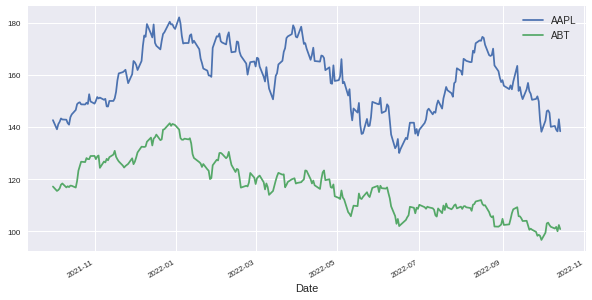

In [12]:
close.plot(figsize=(10,5),fontsize=8)
plt.legend(fontsize=10)
plt.show()

In [13]:
close.iloc[0,0]

142.64999389648438

In [14]:
close.AAPL.div(close.iloc[0,0])

Date
2021-10-01 00:00:00-04:00    1.000000
2021-10-04 00:00:00-04:00    0.975394
2021-10-05 00:00:00-04:00    0.989204
2021-10-06 00:00:00-04:00    0.995443
2021-10-07 00:00:00-04:00    1.004487
                               ...   
2022-10-10 00:00:00-04:00    0.984367
2022-10-11 00:00:00-04:00    0.974273
2022-10-12 00:00:00-04:00    0.969786
2022-10-13 00:00:00-04:00    1.002384
2022-10-14 00:00:00-04:00    0.970067
Name: AAPL, Length: 262, dtype: float64

In [15]:
normclose=close.div(close.iloc[0]).mul(100)

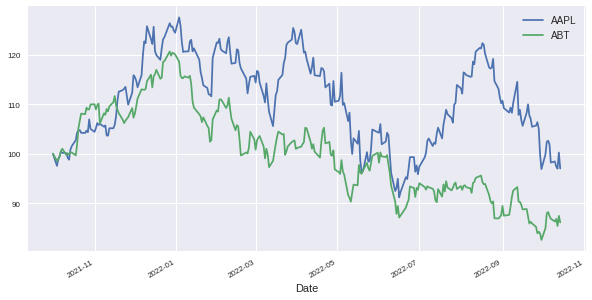

In [16]:
normclose.plot(figsize=(10,5),fontsize=8)
plt.legend(fontsize=10)
plt.show()

In [17]:
aapl=close.AAPL.copy().to_frame()

In [18]:
aapl

,AAPL
Date,
2021-10-01 00:00:00-04:00,142.649994
2021-10-04 00:00:00-04:00,139.139999
2021-10-05 00:00:00-04:00,141.110001
2021-10-06 00:00:00-04:00,142.000000
2021-10-07 00:00:00-04:00,143.289993
...,...
2022-10-10 00:00:00-04:00,140.419998
2022-10-11 00:00:00-04:00,138.979996
2022-10-12 00:00:00-04:00,138.339996


calculating change in previous close to current close

In [19]:
aapl.shift(periods=1)

,AAPL
Date,
2021-10-01 00:00:00-04:00,NaN
2021-10-04 00:00:00-04:00,142.649994
2021-10-05 00:00:00-04:00,139.139999
2021-10-06 00:00:00-04:00,141.110001
2021-10-07 00:00:00-04:00,142.000000
...,...
2022-10-10 00:00:00-04:00,140.089996
2022-10-11 00:00:00-04:00,140.419998
2022-10-12 00:00:00-04:00,138.979996


In [20]:
aapl['lag1']=aapl.shift(periods=1)

In [21]:
aapl.lag1

Date
2021-10-01 00:00:00-04:00           NaN
2021-10-04 00:00:00-04:00    142.649994
2021-10-05 00:00:00-04:00    139.139999
2021-10-06 00:00:00-04:00    141.110001
2021-10-07 00:00:00-04:00    142.000000
                                ...    
2022-10-10 00:00:00-04:00    140.089996
2022-10-11 00:00:00-04:00    140.419998
2022-10-12 00:00:00-04:00    138.979996
2022-10-13 00:00:00-04:00    138.339996
2022-10-14 00:00:00-04:00    142.990005
Name: lag1, Length: 262, dtype: float64

In [22]:
#aapl["diff"]=aapl.AAPL.sub(aapl.lag1)
aapl["diff"]=aapl.AAPL.diff(periods=1)

In [23]:
aapl["change_percent"]=aapl.AAPL.pct_change(periods=1).mul(100)
#aapl["change_percent"]=aapl.AAPL.div(aapl.lag1).sub(1).mul(100)

In [24]:
del aapl["diff"]

In [25]:
aapl.rename(columns= {'change_percent':'change'},inplace=True)

resamping data

M - month
BM - month last working day

In [26]:
aapl.AAPL.resample("BM").last().pct_change(periods=1).mul(100)

Date
2021-10-29 00:00:00-04:00          NaN
2021-11-30 00:00:00-05:00    10.347129
2021-12-31 00:00:00-05:00     7.422870
2022-01-31 00:00:00-05:00    -1.571216
2022-02-28 00:00:00-05:00    -5.526950
2022-03-31 00:00:00-04:00     5.747339
2022-04-29 00:00:00-04:00    -9.713079
2022-05-31 00:00:00-04:00    -5.588327
2022-06-30 00:00:00-04:00    -8.142969
2022-07-29 00:00:00-04:00    18.863365
2022-08-31 00:00:00-04:00    -3.255180
2022-09-30 00:00:00-04:00   -12.097700
2022-10-31 00:00:00-04:00     0.130252
Freq: BM, Name: AAPL, dtype: float64

In [27]:
del aapl["change"]

In [28]:
ret= aapl.pct_change().dropna()

In [29]:
del ret['lag1']

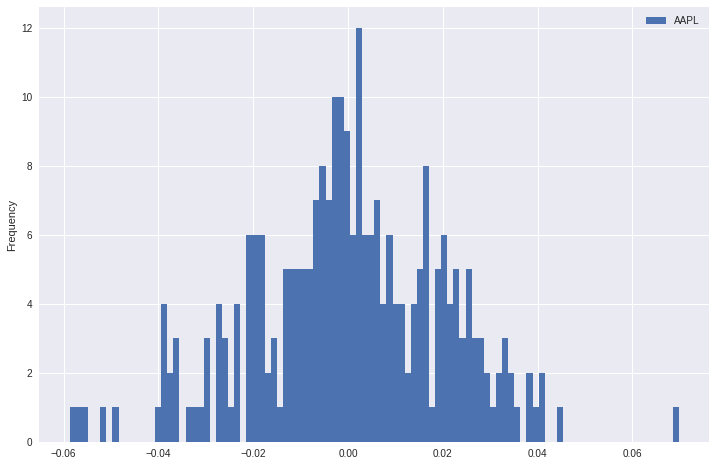

In [30]:
ret.plot(kind="hist",figsize=(12,8),bins=100)
plt.show()

In [31]:
daily_mean_return=ret.mean()
daily_mean_return

AAPL    0.000184
dtype: float64

In [32]:
daily_var=ret.var()
daily_var

AAPL    0.00041
dtype: float64

In [33]:
daily_std=np.sqrt(daily_var) #standard deviation
daily_std

AAPL    0.020244
dtype: float64

In [34]:
ret.std()

AAPL    0.020244
dtype: float64

In [35]:
annual_mean_return=daily_mean_return*252
annual_mean_return

AAPL    0.04626
dtype: float64

In [36]:
annual_var_return=daily_var*252
annual_var_return

AAPL    0.103277
dtype: float64

In [37]:
annual_std_return=np.sqrt(annual_var_return)
annual_std_return

AAPL    0.321368
dtype: float64

In [38]:
ret.std()*np.sqrt(252)

AAPL    0.321368
dtype: float64

In [39]:
ticker=["SPY","AAPL","KO","IBM","DIS","MSFT"]

In [40]:
data=yf.download(ticker,start=start_date,end=end_date)

[*********************100%***********************]  6 of 6 completed


In [41]:
close=data.loc[:,"Close"].copy()

In [42]:
normclose=close.div(close.iloc[0]).mul(100)

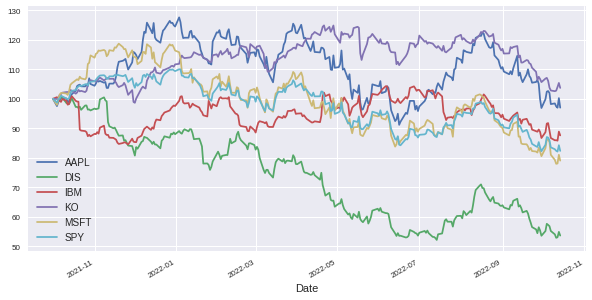

In [43]:
normclose.plot(figsize=(10,5),fontsize=8)
plt.legend(fontsize=10)
plt.show()

In [44]:
ret=normclose.pct_change().dropna()

In [45]:
ret.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,261.0,0.000089,0.020263,-0.058680,-0.011676,0.000000,0.014923,0.069778
DIS,261.0,-0.002178,0.020223,-0.070737,-0.014956,-0.003019,0.010505,0.046785
IBM,261.0,-0.000387,0.015447,-0.095631,-0.008107,-0.000171,0.007674,0.071003
KO,261.0,0.000214,0.012213,-0.069626,-0.005264,0.001400,0.007028,0.038671
MSFT,261.0,-0.000701,0.019950,-0.054978,-0.012014,-0.001381,0.011995,0.066852
SPY,261.0,-0.000644,0.014080,-0.043482,-0.008819,-0.000817,0.008228,0.031794


In [46]:
summary=ret.describe().T.loc[:,["mean","std"]]

In [47]:
summary["mean"]=summary["mean"]*252
summary["std"]=summary["std"]*np.sqrt(252)

Text(0.5, 1.0, 'risk dashboard')

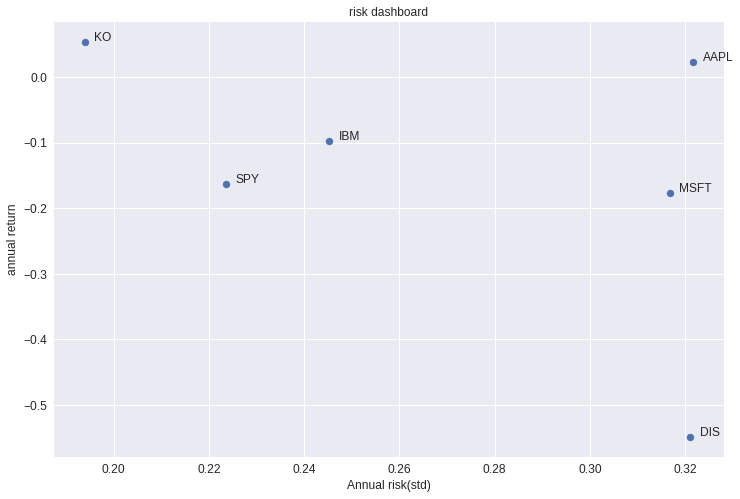

In [48]:
summary.plot.scatter(x="std",y="mean",figsize=(12,8),s=50,fontsize=12)
for i in summary.index:
    plt.annotate(i,xy=(summary.loc[i,"std"]+0.002,summary.loc[i,"mean"]+0.002 ),size=12)
plt.xlabel("Annual risk(std)", fontsize=12)
plt.ylabel("annual return", fontsize=12)
plt.title("risk dashboard")

covariance and corelation

In [49]:
#covariance
ret.cov()
ret.corr()

,AAPL,DIS,IBM,KO,MSFT,SPY
AAPL,1.000000,0.621586,0.363838,0.410347,0.791166,0.856154
DIS,0.621586,1.000000,0.267456,0.336743,0.621469,0.759908
IBM,0.363838,0.267456,1.000000,0.410499,0.305744,0.451433
KO,0.410347,0.336743,0.410499,1.000000,0.391616,0.530383
MSFT,0.791166,0.621469,0.305744,0.391616,1.000000,0.861100
SPY,0.856154,0.759908,0.451433,0.530383,0.861100,1.000000


In [50]:
#pip install seaborn
import seaborn as sns

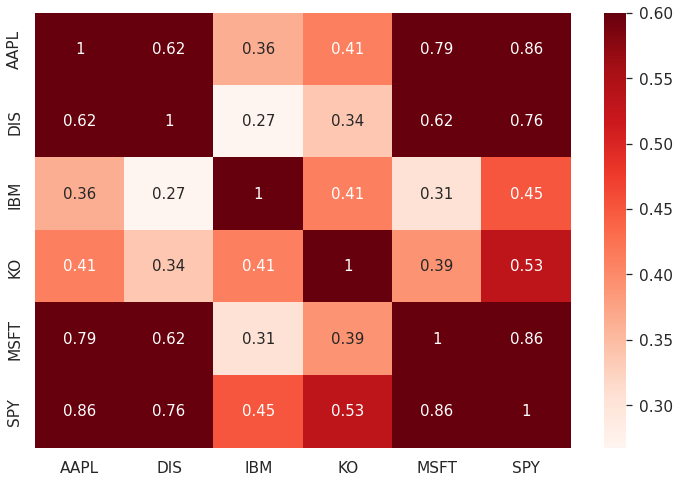

In [51]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(ret.corr(),cmap="Reds",annot=True,annot_kws={"size":15},vmax=0.6)
plt.show()

#go for less correlated stocks for better diversification
# the above is for long term investment

simple returns and log Returns

In [52]:
df=pd.DataFrame(index=[2022,2021,2020],data=[20,40,30],columns=["Price"])
df

,Price
2022,20
2021,40
2020,30


In [53]:
simplereturns=df.pct_change().dropna()
simplereturns

,Price
2021,1.00
2020,-0.25


In [54]:
simplereturns.mean()

Price    0.375
dtype: float64

mean returns are misleading

In [55]:
logreturns=np.log(df/df.shift(1)).dropna()
logreturns

,Price
2021,0.693147
2020,-0.287682


In [56]:
logreturns.mean()

Price    0.202733
dtype: float64

In [57]:
20*np.exp(logreturns.mean()*2)

Price    30.0
dtype: float64

In [58]:
#simple moviing average
SPY=yf.download("SPY")

[*********************100%***********************]  1 of 1 completed


In [59]:
spy=SPY.Close.to_frame()

In [60]:
spy

,Close
Date,
1993-01-29 00:00:00-05:00,43.937500
1993-02-01 00:00:00-05:00,44.250000
1993-02-02 00:00:00-05:00,44.343750
1993-02-03 00:00:00-05:00,44.812500
1993-02-04 00:00:00-05:00,45.000000
...,...
2022-11-07 00:00:00-05:00,379.950012
2022-11-08 00:00:00-05:00,382.000000
2022-11-09 00:00:00-05:00,374.130005


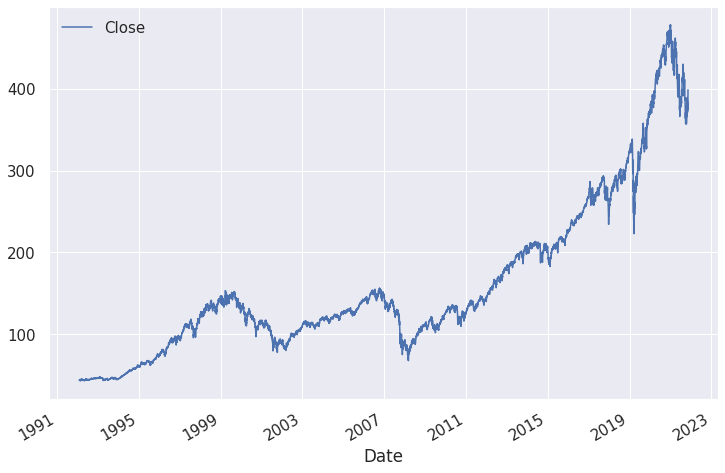

In [61]:
spy.plot(figsize=(12,8),fontsize=15)
plt.legend(loc="upper left",fontsize=15)
plt.show()

In [62]:
spy_roll=spy.rolling(window=10)

In [63]:
spy_roll=spy_roll.mean()

In [64]:
spy_roll

,Close
Date,
1993-01-29 00:00:00-05:00,NaN
1993-02-01 00:00:00-05:00,NaN
1993-02-02 00:00:00-05:00,NaN
1993-02-03 00:00:00-05:00,NaN
1993-02-04 00:00:00-05:00,NaN
...,...
2022-11-07 00:00:00-05:00,380.885001
2022-11-08 00:00:00-05:00,380.592999
2022-11-09 00:00:00-05:00,379.804001


In [65]:
spy.rolling(window=10).median()

,Close
Date,
1993-01-29 00:00:00-05:00,NaN
1993-02-01 00:00:00-05:00,NaN
1993-02-02 00:00:00-05:00,NaN
1993-02-03 00:00:00-05:00,NaN
1993-02-04 00:00:00-05:00,NaN
...,...
2022-11-07 00:00:00-05:00,381.000000
2022-11-08 00:00:00-05:00,380.990005
2022-11-09 00:00:00-05:00,379.965012


In [66]:
spy.rolling(window=10,min_periods=5).min().head(15)

,Close
Date,
1993-01-29 00:00:00-05:00,NaN
1993-02-01 00:00:00-05:00,NaN
1993-02-02 00:00:00-05:00,NaN
1993-02-03 00:00:00-05:00,NaN
1993-02-04 00:00:00-05:00,43.93750
1993-02-05 00:00:00-05:00,43.93750
1993-02-08 00:00:00-05:00,43.93750
1993-02-09 00:00:00-05:00,43.93750
1993-02-10 00:00:00-05:00,43.93750


In [67]:
# 50 DEMA
spy["sma50"]=spy.rolling(window=50,min_periods=50).mean()

In [68]:
spy.head(55)

,Close,sma50
Date,,
1993-01-29 00:00:00-05:00,43.93750,NaN
1993-02-01 00:00:00-05:00,44.25000,NaN
1993-02-02 00:00:00-05:00,44.34375,NaN
1993-02-03 00:00:00-05:00,44.81250,NaN
1993-02-04 00:00:00-05:00,45.00000,NaN
1993-02-05 00:00:00-05:00,44.96875,NaN
1993-02-08 00:00:00-05:00,44.96875,NaN
1993-02-09 00:00:00-05:00,44.65625,NaN
1993-02-10 00:00:00-05:00,44.71875,NaN


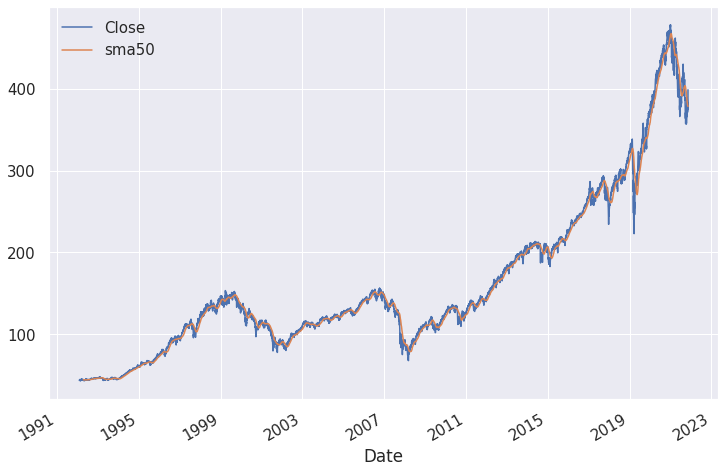

In [69]:
spy.plot(figsize=(12,8),fontsize=15)
plt.legend(loc="upper left",fontsize=15)
plt.show()

In [70]:
# 200 DEMA
spy["sma200"]=spy.Close.rolling(window=200,min_periods=200).mean()

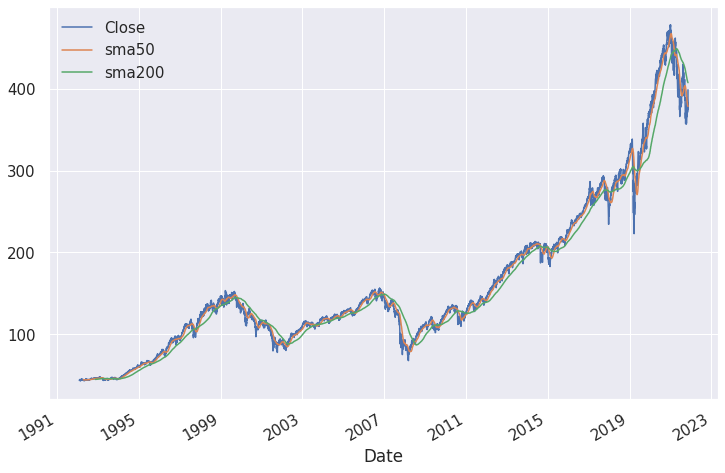

In [71]:
spy.plot(figsize=(12,8),fontsize=15)
plt.legend(loc="upper left",fontsize=15)
plt.show()

Exponential moving average

In [72]:
spy["ema100"]=spy.Close.ewm(span=100,min_periods=100).mean()

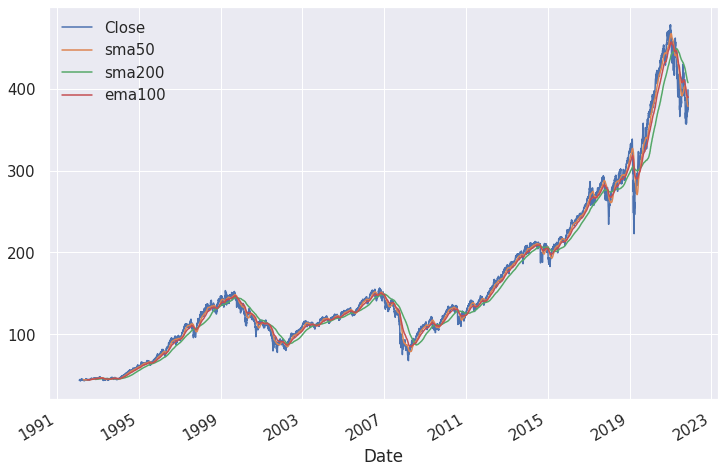

In [73]:
spy.plot(figsize=(12,8),fontsize=15)
plt.legend(loc="upper left",fontsize=15)
plt.show()

In [74]:
spy['day']=spy.index.day_name()

In [75]:
spy['quarter']=spy.index.quarter

In [76]:
spy

,Close,sma50,sma200,ema100,day,quarter
Date,,,,,,
1993-01-29 00:00:00-05:00,43.937500,NaN,NaN,NaN,Friday,1
1993-02-01 00:00:00-05:00,44.250000,NaN,NaN,NaN,Monday,1
1993-02-02 00:00:00-05:00,44.343750,NaN,NaN,NaN,Tuesday,1
1993-02-03 00:00:00-05:00,44.812500,NaN,NaN,NaN,Wednesday,1
1993-02-04 00:00:00-05:00,45.000000,NaN,NaN,NaN,Thursday,1
...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,379.950012,379.087801,408.107051,389.551921,Monday,4
2022-11-08 00:00:00-05:00,382.000000,378.675201,407.817851,389.402378,Tuesday,4
2022-11-09 00:00:00-05:00,374.130005,378.193601,407.516151,389.099954,Wednesday,4


In [77]:
spy=yf.download("SPY")

[*********************100%***********************]  1 of 1 completed


In [78]:
spy=spy.Close.to_frame()

In [79]:
alldays=pd.date_range(start='1993-01-01',end='2020-01-01',freq='D')

In [80]:
spy=spy.reindex(alldays)

In [81]:
# ffill -- forward fill
# bfill -- backward fill
spy.fillna(method='ffill')

,Close
1993-01-01,NaN
1993-01-02,NaN
1993-01-03,NaN
1993-01-04,NaN
1993-01-05,NaN
...,...
2019-12-28,NaN
2019-12-29,NaN
2019-12-30,NaN
2019-12-31,NaN


# intraday data cannot extend last 60 days

Cumulative returns and Drawdowns

In [82]:
apple=yf.download('AAPL')

[*********************100%***********************]  1 of 1 completed


In [83]:
apple=apple.Close.to_frame()

In [84]:
apple["d_returns"]=np.log(apple.div(apple.shift(1)))

In [86]:
apple.dropna(inplace=True)

In [87]:
apple.d_returns.sum()

7.061643280559523

In [88]:
np.exp(apple.d_returns.sum())

1166.3602489548787

In [90]:
apple['cumreturns']=apple.d_returns.cumsum().apply(np.exp)

In [91]:
apple

,Close,d_returns,cumreturns
Date,,,
1980-12-15 00:00:00-05:00,0.121652,-0.053581,0.947829
1980-12-16 00:00:00-05:00,0.112723,-0.076231,0.878261
1980-12-17 00:00:00-05:00,0.115513,0.024450,0.899998
1980-12-18 00:00:00-05:00,0.118862,0.028580,0.926092
1980-12-19 00:00:00-05:00,0.126116,0.059239,0.982610
...,...,...,...
2022-11-07 00:00:00-05:00,138.919998,0.003895,1082.369853
2022-11-08 00:00:00-05:00,139.500000,0.004166,1086.888831
2022-11-09 00:00:00-05:00,134.869995,-0.033753,1050.814992


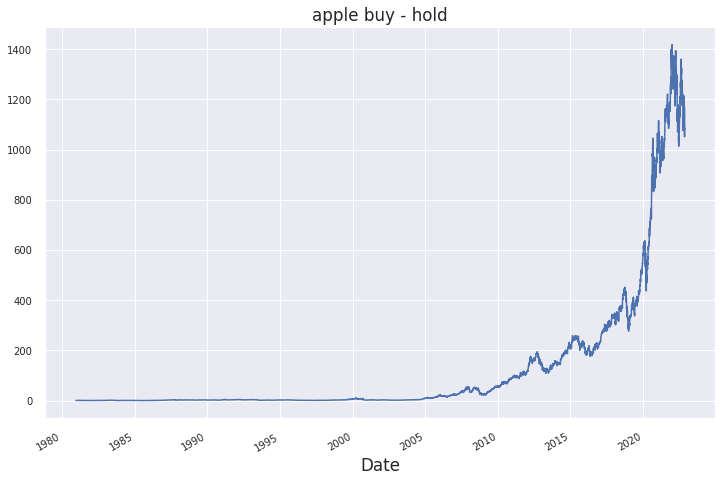

In [92]:
apple.cumreturns.plot(figsize=(12,8),title="apple buy - hold",fontsize=10)
plt.show()

In [93]:
apple.d_returns.mean()*252 #mean return / year

0.1683729876715867

In [94]:
apple.d_returns.std()*np.sqrt(252) #standard deviation per year

0.45617640338991533

In [95]:
#to calculate drawdowns
apple['cummax']=apple.cumreturns.cummax()

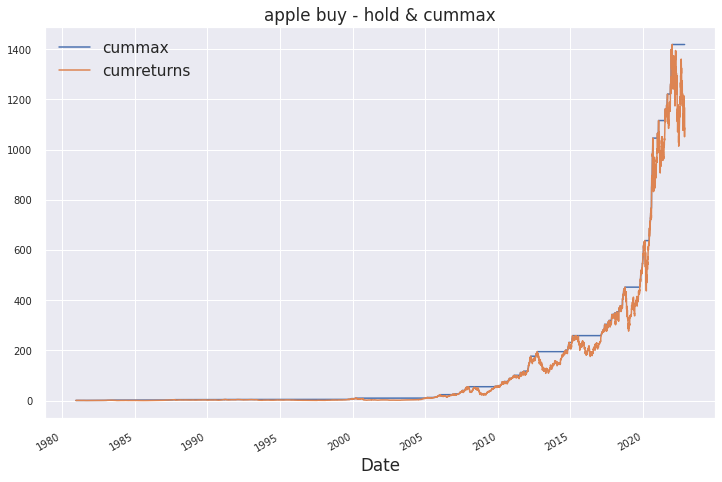

In [97]:
apple[["cummax","cumreturns"]].plot(figsize=(12,8),title="apple buy - hold & cummax",fontsize=10)
plt.show()

In [98]:
apple['drawdown']=apple['cummax']-apple['cumreturns']

In [99]:
apple.drawdown.max()

404.7589352637674

In [100]:
apple.drawdown.idxmax()

Timestamp('2022-06-16 00:00:00-0400', tz='America/New_York')

In [102]:
apple.loc[(apple.index<='2022-06-16')]

,Close,d_returns,cumreturns,cummax,drawdown
Date,,,,,
1980-12-15 00:00:00-05:00,0.121652,-0.053581,0.947829,0.947829,0.000000
1980-12-16 00:00:00-05:00,0.112723,-0.076231,0.878261,0.947829,0.069569
1980-12-17 00:00:00-05:00,0.115513,0.024450,0.899998,0.947829,0.047831
1980-12-18 00:00:00-05:00,0.118862,0.028580,0.926092,0.947829,0.021738
1980-12-19 00:00:00-05:00,0.126116,0.059239,0.982610,0.982610,0.000000
...,...,...,...,...,...
2022-06-10 00:00:00-04:00,137.130005,-0.039395,1068.423446,1418.097708,349.674261
2022-06-13 00:00:00-04:00,131.880005,-0.039037,1027.519028,1418.097708,390.578680
2022-06-14 00:00:00-04:00,132.759995,0.006650,1034.375307,1418.097708,383.722401


In [104]:
apple['drawdown_pct']=(apple['cummax']-apple['cumreturns'])/apple['cummax']

In [106]:
apple.drawdown_pct.max()

0.82216567924191

#SMA stategy 1:57

In [108]:
data=apple.Close.loc[(apple.index>='1991-01-01')]

In [109]:
data=data.to_frame()

In [110]:
sma_s=50
sma_l=100

In [111]:
data['sma_s']=data.Close.rolling(sma_s).mean()
data['sma_l']=data.Close.rolling(sma_l).mean()

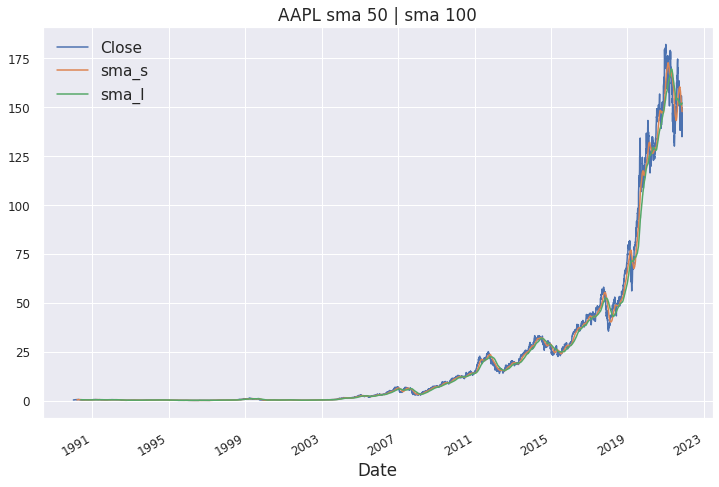

In [112]:
data.plot(figsize=(12,8),title="AAPL sma {} | sma {}".format(sma_s,sma_l), fontsize=12)
plt.show()

<AxesSubplot:title={'center':'AAPL sma 50 | sma 100'}, xlabel='Date'>

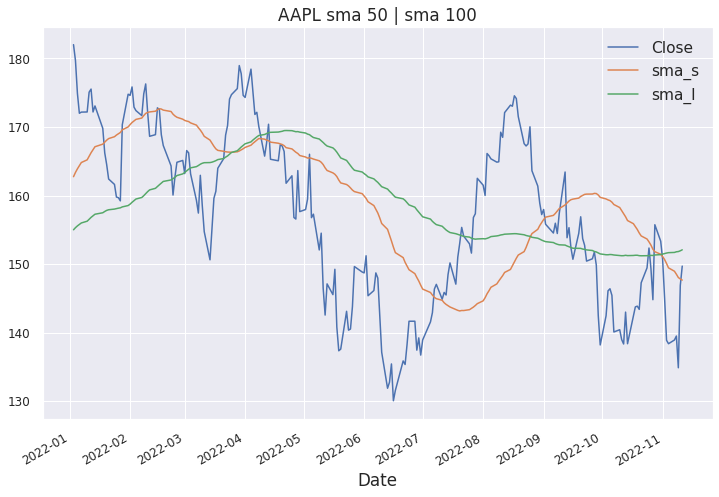

In [113]:
data.loc['2022'].plot(figsize=(12,8),title="AAPL sma {} | sma {}".format(sma_s,sma_l), fontsize=12)

In [114]:
data['position']=np.where(data['sma_s']>data['sma_l'],1,-1)

<AxesSubplot:title={'center':'AAPL sma 50 | sma 100'}, xlabel='Date'>

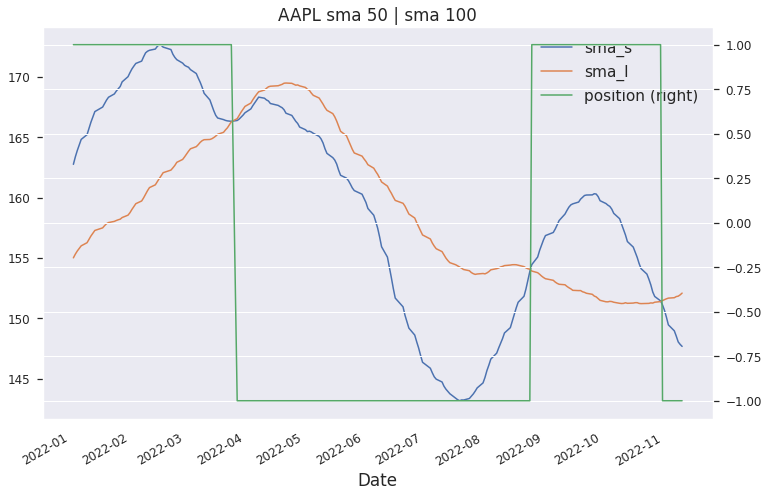

In [120]:
data.loc['2022',['sma_s','sma_l','position']].plot(figsize=(12,8),title="AAPL sma {} | sma {}".format(sma_s,sma_l), fontsize=12,secondary_y='position')

#BACK TESTING

In [121]:
data["retrun_buy_hold"]=np.log(data.Close.div(data.Close.shift(1)))

In [122]:
data['stragtegy']=data['retrun_buy_hold']*data.position.shift(1)

In [123]:
data

,Close,sma_s,sma_l,position,retrun_buy_hold,stragtegy
Date,,,,,,
1991-01-02 00:00:00-05:00,0.388393,NaN,NaN,-1,NaN,NaN
1991-01-03 00:00:00-05:00,0.383929,NaN,NaN,-1,-0.011560,0.011560
1991-01-04 00:00:00-05:00,0.386161,NaN,NaN,-1,0.005797,-0.005797
1991-01-07 00:00:00-05:00,0.386161,NaN,NaN,-1,0.000000,-0.000000
1991-01-08 00:00:00-05:00,0.386161,NaN,NaN,-1,0.000000,-0.000000
...,...,...,...,...,...,...
2022-11-07 00:00:00-05:00,138.919998,148.954200,151.6979,-1,0.003895,-0.003895
2022-11-08 00:00:00-05:00,139.500000,148.516599,151.7923,-1,0.004166,-0.004166
2022-11-09 00:00:00-05:00,134.869995,148.035799,151.8254,-1,-0.033753,0.033753


In [124]:
data.dropna(inplace=True)

In [126]:
data[["retrun_buy_hold","stragtegy"]].sum()

retrun_buy_hold    5.893072
stragtegy          1.990820
dtype: float64

In [127]:
data[["retrun_buy_hold","stragtegy"]].sum().apply(np.exp)

retrun_buy_hold    362.517138
stragtegy            7.321536
dtype: float64

In [128]:
data[["retrun_buy_hold","stragtegy"]].std()*np.sqrt(252)

retrun_buy_hold    0.440693
stragtegy          0.440833
dtype: float64

 2:12 strategy to long bias omit short

In [130]:
data['position2']=np.where(data['sma_s']>data['sma_l'],1,0)

In [131]:
data['stragtegy2']=data['retrun_buy_hold']*data.position2.shift(1)

In [132]:
data.dropna(inplace=True)

In [133]:
data[["retrun_buy_hold","stragtegy2"]].sum()

retrun_buy_hold    5.917695
stragtegy2         3.941946
dtype: float64

In [134]:
data[["retrun_buy_hold","stragtegy2"]].sum().apply(np.exp)

retrun_buy_hold    371.554359
stragtegy2          51.518755
dtype: float64

In [135]:
data[["retrun_buy_hold","stragtegy"]].std()*np.sqrt(252)

retrun_buy_hold    0.440697
stragtegy          0.440839
dtype: float64

check alpha vantage for tranding data

Creating our function

In [ ]:
video link :
https://www.youtube.com/watch?v=GDMkkmkJigw&list=PLkuayPwRNHQh1N6Gv-INtGvF2qQSejpAu&index=4&t=4205s